In [255]:
import pandas as pd
import numpy as np
import csv
import os
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
import re
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re
from nltk.corpus import wordnet
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from yellowbrick.classifier import ClassificationReport
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import average_precision_score




In [256]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [257]:
train=pd.read_csv("review_polarity/csv/Train_data.csv")
test=pd.read_csv("review_polarity/csv/test_data.csv") 


In [258]:
# def TurnToString(df):
#     for index, row in df.iterrows():
#         if row['Label'] == 1:
#             df.at[index, 'Label'] = 'pos'
#         elif row['Label'] == 0:
#             df.at[index, 'Label'] = 'neg'
#     return df

In [259]:
# train=TurnToString(train)
# test=TurnToString(test)

In [260]:
print(train)

                                                 Review  Label
0     usually when a blockbuster comes out , it's lo...      1
1     susan granger's review of " songcatcher " in t...      1
2     the caveman's valentine starring samuel l . ja...      1
3     seen february 15 , 1998 on home video ( borrow...      1
4     when people are talking about good old times ,...      1
...                                                 ...    ...
1595  a life less ordinary ( r ) while the extremely...      0
1596  the lives of older people in the twilight of t...      0
1597  what would inspire someone who cannot write or...      0
1598  senseless ( r ) marlon wayans is a very talent...      0
1599  i saw this film on christmas day expecting an ...      0

[1600 rows x 2 columns]


In [261]:
def Review_cleaning(data):
# Convert text to lowercase
    data['Review'] = data['Review'].apply(lambda x: str(x).lower())

    # Replace newline characters with an empty string
    data['Review'] = data['Review'].apply(lambda x: re.sub(r'\\n', ' ', x))

    # Remove special characters and punctuations
    data['Review'] = data['Review'].apply(lambda x: re.sub(r'[^\w\s]+', '', x))

    # Remove numbers
    data['Review'] = data['Review'].apply(lambda x: " ".join([word for word in x.split() if not any(char.isdigit() for char in word)]))
    
    # Remove extra whitespaces
    data['Review'] = data['Review'].apply(lambda x: re.sub(r'\s+', ' ', x))
    
    # Remove stop words
    data['Review'] = data['Review'].apply(lambda x: " ".join([word for word in x.lower().split() if word not in stop_words]))
    
    # Remove empty strings
    data['Review'] = data['Review'][data['Review'].apply(lambda x: len(x)>0)]
    
    return data

In [262]:
train = Review_cleaning(train)
test = Review_cleaning(test)

In [263]:
# Tokenization
train['Review'] = train['Review'].apply(word_tokenize)
# Lemmatization
lemmatizer = WordNetLemmatizer()
train['Review'] = train['Review'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])

# Tokenization
test['Review'] = test['Review'].apply(word_tokenize)
# Lemmatization
lemmatizer = WordNetLemmatizer()
test['Review'] = test['Review'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])


In [264]:
test

,Review,Label
0,"[breed, apart, cast, rutger, hauer, crazy, bir...",1
1,"[grand, scheme, mel, gibson, movie, payback, b...",1
2,"[want, know, truth, cat, dog, well, movie, sho...",1
3,"[devil, take, asks, rhetorically, lulling, voi...",1
4,"[bruce, barth, mellow, piano, play, background...",1
...,...,...
395,"[back, february, monthly, los, angeles, comic,...",0
396,"[plot, something, bunch, kid, going, haunted, ...",0
397,"[take, two, old, dying, men, lifetime, regret,...",0
398,"[movie, deep, religious, spiritual, undertone,...",0


### Turn It to TF-IDF

In [265]:
vectorizer = TfidfVectorizer(min_df = 5,
                             max_df = 0.8,
                             sublinear_tf = True,
                             use_idf = True)

train_vectors = vectorizer.fit_transform(train['Review'].apply(lambda x: ' '.join(x)))
test_vectors = vectorizer.transform(test['Review'].apply(lambda x: ' '.join(x)))

### Turn it To WordToVec (Trial)

In [266]:
# model = gensim.models.Word2Vec(train['Review'], vector_size=100, window=5, min_count=5, workers=4)

# train_vectors = []
# for review in train['Review']:
#     review_vecs = []
#     for word in review:
#         try:
#             vec = model.wv[word]
#             review_vecs.append(vec)
#         except KeyError:
#             # Ignore, if the word doesn't exist in the vocabulary
#             pass
#     train_vectors.append(review_vecs)

# test_vectors = []
# for review in test['Review']:
#     review_vecs = []
#     for word in review:
#         try:
#             vec = model.wv[word]
#             review_vecs.append(vec)
#         except KeyError:
#             # Ignore, if the word doesn't exist in the vocabulary
#             pass
#     test_vectors.append(review_vecs)
# train_vectors = np.array([np.mean([model.wv[word] for word in review if word in model.wv], axis=0) for review in train['Review']])
# test_vectors = np.array([np.mean([model.wv[word] for word in review if word in model.wv], axis=0) for review in test['Review']])


In [267]:
train['Review'].apply(lambda x: ' '.join(x))[0]

'usually blockbuster come loaded effect star bad script plenty action mystery men may contain allstar cast efects clever script character really work rare see year film based upon comic book series flaming carrot bob burden wan na super hero try fight crime done real hero champion city captain amazing greg kinnear thing go little haywire sinister casanova frankenstein geoffrey rush released city capture captain amazing plan wreak havoc upon champion city well trio decide take matter hand saving city first need assitance film take turn better beggining wan na hero blue raja hank azaria mr furious ben stiller shoveller william h macy sure enterataining act grew old fast aquire invisible boy kel mitchell bowler janeane garafalo mr splein paul reuben rescue film becoming disastorous mess thankfully original hero become amusing support reuben garfalo screen whole premise rather ridiculous pack punch keep interest one film considerably clever literally poke fun super hero film like batman ro

In [268]:
classifier_linear = svm.SVC(kernel='linear', probability=True)
classifier_linear.fit(train_vectors, train['Label'])
prediction_linear = classifier_linear.predict(test_vectors)
score_linear = classifier_linear.predict_proba(test_vectors)[:,1]


In [269]:
print("Results for SVC(kernel=linear)")
report = classification_report(test['Label'], prediction_linear, output_dict=True)
accuracy = accuracy_score(test['Label'], prediction_linear)
print("accuarcy : ",accuracy)
print('positive: ', report['1'])
print('negative: ', report['0'])

Results for SVC(kernel=linear)
accuarcy :  0.8475
positive:  {'precision': 0.8202764976958525, 'recall': 0.89, 'f1-score': 0.8537170263788969, 'support': 200}
negative:  {'precision': 0.8797814207650273, 'recall': 0.805, 'f1-score': 0.8407310704960835, 'support': 200}


## Visualization

### Classification Report Of SVC

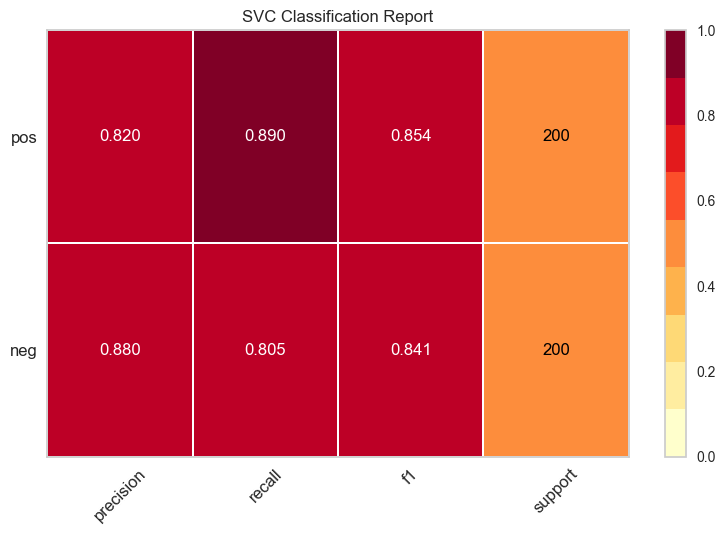

<Axes: title={'center': 'SVC Classification Report'}>

In [270]:
visualizer = ClassificationReport(classifier_linear, classes=['neg', 'pos'], support=True)
visualizer.fit(train_vectors, train['Label'])
visualizer.score(test_vectors, test['Label'])
visualizer.show()

### Confusion Matrix

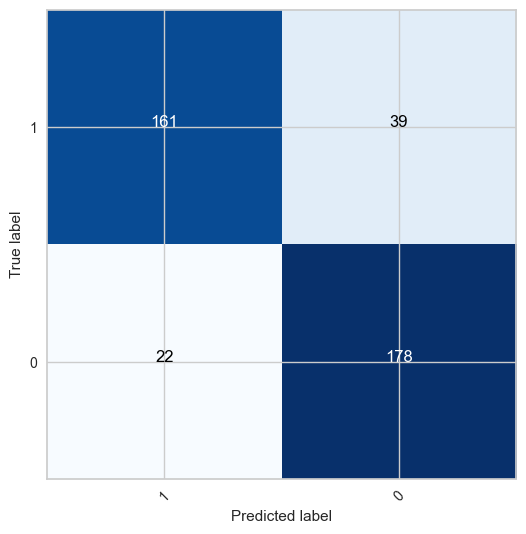

In [271]:
cm = confusion_matrix(test['Label'], prediction_linear)
plt.imshow(cm, cmap='Blues')
thresh = cm.max() / 2.

for i in range(len(['1','0'])):
    for j in range(len(['1','0'])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.xticks(range(len(['1','0'])), ['1','0'], rotation=45)
plt.yticks(range(len(['1','0'])), ['1','0'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()

### ROC Representation

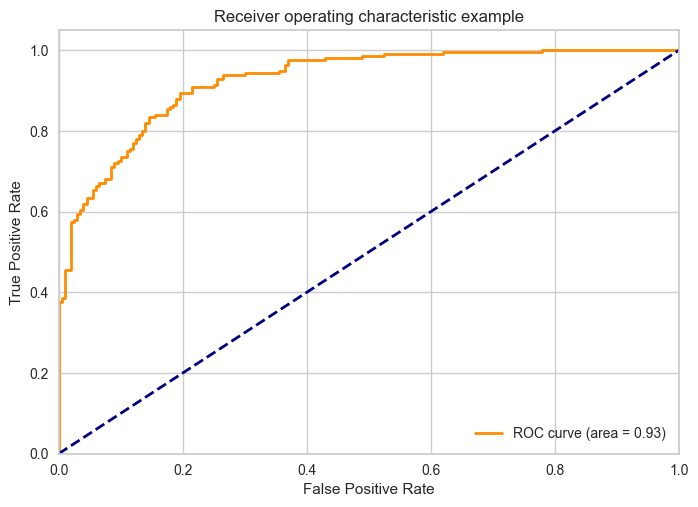

In [272]:
fpr, tpr, _ = roc_curve(test['Label'], score_linear)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='darkorange',
         lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()